# Classificator For Crediticial Risk

En el Notebook se utiliza la metodología:  _Life cycle of Machine Learning Project_ 


## 1. Undertanding The Problem Statement

Este proyecto tiene como fin realizar un proyecto end-to-end de ML para lograr una clasificación binaria del riesgo crediticio utilizando features numéricos y categóricos.

## 2. Extracción de Datos

Los datos son tomados de [Link](https://raw.githubusercontent.com/Waikato/weka-3.8/master/wekadocs/data/credit-g.arff).

La variable `meta` describe las características de las 21 variables consideradas. 




In [1]:
import io 
import sys 
import requests
import pandas as pd 
import numpy as np 
from scipy.io import arff
import seaborn as sns 
import matplotlib.pyplot as plt 

SEED = 21

In [2]:
from src.exception import CustomException

url = "https://raw.githubusercontent.com/Waikato/weka-3.8/master/wekadocs/data/credit-g.arff"

try:
    response = requests.get(url)    
    data, meta = arff.loadarff(io.StringIO(response.text))    
    
    df = pd.DataFrame(data)
    
    for col in df.columns:
        if df[col].dtype == object:
            df[col] = df[col].str.decode('utf-8')
    print('Data extraida correctamente') 

except Exception as e:
    raise CustomException(e,sys)

Data extraida correctamente


In [5]:
# meta

### 2.1  Exploration

In [3]:
# df.info() # para ver generalmente el tipo de datos con el que vamos a trabajar. 
df.nunique()

checking_status             4
duration                   33
credit_history              5
purpose                    10
credit_amount             921
savings_status              5
employment                  5
installment_commitment      4
personal_status             4
other_parties               3
residence_since             4
property_magnitude          4
age                        53
other_payment_plans         3
housing                     3
existing_credits            4
job                         4
num_dependents              2
own_telephone               2
foreign_worker              2
class                       2
dtype: int64

In [11]:
# df.isnull().sum() # None null data

#### 2.1.1 Distribución de clases 



In [3]:
import warnings
from collections import Counter 

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.style.use('ggplot')

	 [('good', 700), ('bad', 300)] 



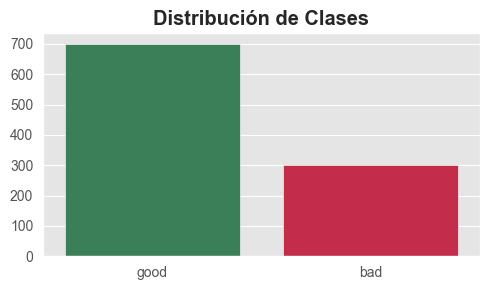

In [4]:
palette = {'good': '#2E8B57', 'bad': '#DC143C'}

class_counts = Counter(df['class'])
print("\t",list(class_counts.items()),"\n")
plt.figure(figsize=(5, 3))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()),
            palette=list(palette.values()))  
plt.title('Distribución de Clases', fontweight='bold')
plt.tight_layout()
plt.show()

Tenemos una desbalceo de las clases donde la clase `bad` es apaenas el $0.43$% de la clase `good`.

#### 2.1.2 Exploración por la Edad

In [5]:
age_good = df.loc[df['class'] == 'good']['age'].to_list()
age_bad = df.loc[df['class'] == 'bad']['age'].to_list()

In [7]:
def print_estadisticas(valores):
    print(f"• Promedio: {np.mean(valores):.1f}")
    print(f"• Mediana: {np.median(valores):.1f}")
    print(f"• Mínimo: {np.min(valores)}")
    print(f"• Máximo: {np.max(valores)}")
    print(f"• Rango: {np.min(valores)} - {np.max(valores)}")
    print(f"• Desviación estándar: {np.std(valores):.1f}")
    print(f"• Percentil 25: {np.percentile(valores, 25):.1f}")
    print(f"• Percentil 75: {np.percentile(valores, 75):.1f}")
    print("-" * 30)
    
print_estadisticas(age_good)
print_estadisticas(age_bad)

• Promedio: 36.2
• Mediana: 34.0
• Mínimo: 19.0
• Máximo: 75.0
• Rango: 19.0 - 75.0
• Desviación estándar: 11.4
• Percentil 25: 27.0
• Percentil 75: 42.2
------------------------------
• Promedio: 34.0
• Mediana: 31.0
• Mínimo: 19.0
• Máximo: 74.0
• Rango: 19.0 - 74.0
• Desviación estándar: 11.2
• Percentil 25: 25.0
• Percentil 75: 40.0
------------------------------


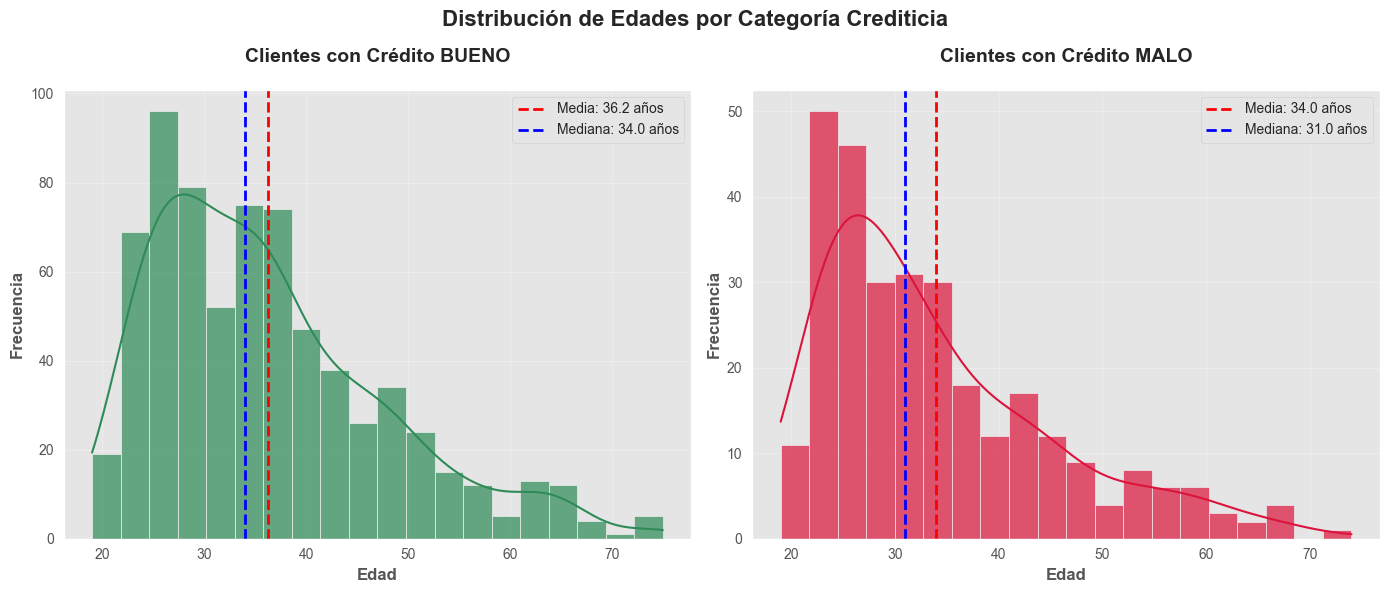

In [112]:
# Histogramas por Edad
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Distribución de Edades por Categoría Crediticia', 
             fontsize=16, fontweight='bold', y=0.98)

sns.histplot(age_good, bins=20, kde=True, ax=ax1, color='#2E8B57', alpha=0.7)
ax1.set_title('Clientes con Crédito BUENO', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Edad', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

mean_good = np.mean(age_good)
median_good = np.median(age_good)
ax1.axvline(mean_good, color='red', linestyle='--', linewidth=2, 
            label=f'Media: {mean_good:.1f} años')
ax1.axvline(median_good, color='blue', linestyle='--', linewidth=2, 
            label=f'Mediana: {median_good:.1f} años')
ax1.legend()

sns.histplot(age_bad, bins=20, kde=True, ax=ax2, color='#DC143C', alpha=0.7)
ax2.set_title('Clientes con Crédito MALO', fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('Edad', fontsize=12, fontweight='bold')
ax2.set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

mean_bad = np.mean(age_bad)
median_bad = np.median(age_bad)
ax2.axvline(mean_bad, color='red', linestyle='--', linewidth=2, 
            label=f'Media: {mean_bad:.1f} años')
ax2.axvline(median_bad, color='blue', linestyle='--', linewidth=2, 
            label=f'Mediana: {median_bad:.1f} años')
ax2.legend()

plt.tight_layout()
plt.show()


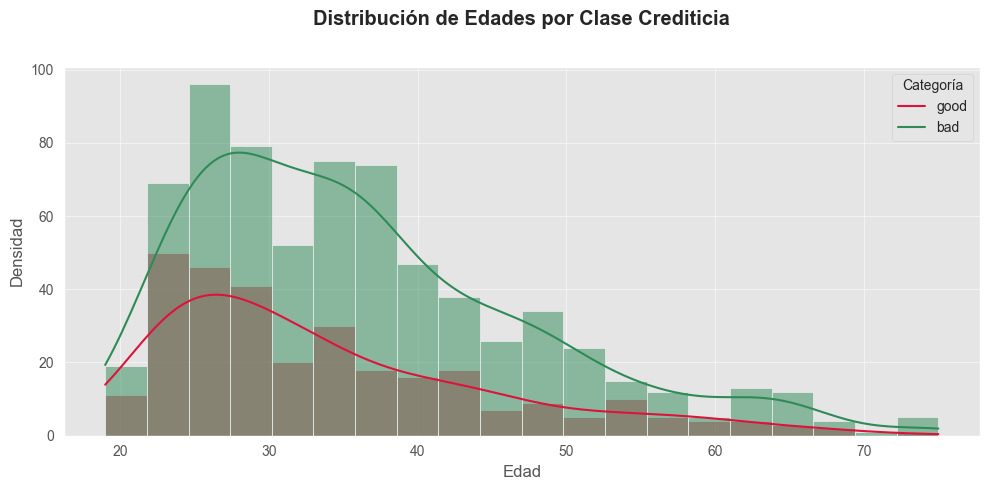

In [113]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age', hue='class', bins=20, kde=True,palette=palette)
plt.title('Distribución de Edades por Clase Crediticia', fontweight='bold', pad=30)
plt.xlabel('Edad'), plt.ylabel('Densidad'), plt.grid(True, alpha=0.5)
plt.legend(title='Categoría', labels=palette.keys())
plt.tight_layout()
plt.show()

In [6]:
# Creamos categorias 
interval = (18, 25, 35, 60, 120)
cats = ['Joven', 'Adulto joven', 'Adulto', 'Adulto mayor']
df["Age_cat"] = pd.cut(df.age, interval, labels=cats)

In [70]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,Age_cat
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,67.0,none,own,2.0,skilled,1.0,yes,yes,good,Adulto mayor
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,22.0,none,own,1.0,skilled,1.0,none,yes,bad,Joven
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good,Adulto
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,45.0,none,for free,1.0,skilled,2.0,none,yes,good,Adulto
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,53.0,none,for free,2.0,skilled,2.0,none,yes,bad,Adulto


In [118]:
meta

Dataset: german_credit
	checking_status's type is nominal, range is ('<0', '0<=X<200', '>=200', 'no checking')
	duration's type is numeric
	credit_history's type is nominal, range is ('no credits/all paid', 'all paid', 'existing paid', 'delayed previously', 'critical/other existing credit')
	purpose's type is nominal, range is ('new car', 'used car', 'furniture/equipment', 'radio/tv', 'domestic appliance', 'repairs', 'education', 'vacation', 'retraining', 'business', 'other')
	credit_amount's type is numeric
	savings_status's type is nominal, range is ('<100', '100<=X<500', '500<=X<1000', '>=1000', 'no known savings')
	employment's type is nominal, range is ('unemployed', '<1', '1<=X<4', '4<=X<7', '>=7')
	installment_commitment's type is numeric
	personal_status's type is nominal, range is ('male div/sep', 'female div/dep/mar', 'male single', 'male mar/wid', 'female single')
	other_parties's type is nominal, range is ('none', 'co applicant', 'guarantor')
	residence_since's type is nume

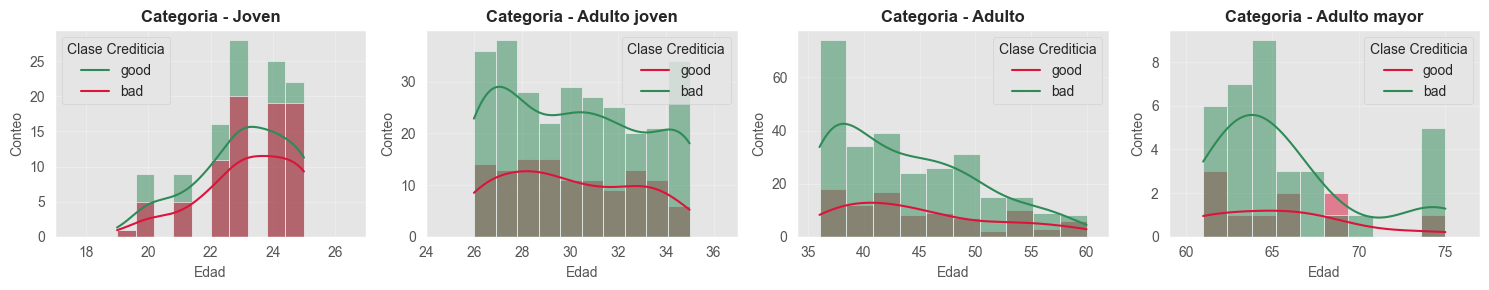

In [178]:
fig, axes = plt.subplots(1,4, figsize=(15, 3))
axes = axes.flatten()  
for i, categoria in enumerate(cats):
    df_fil = df[df['Age_cat'] == categoria]
    sns.histplot(data=df_fil, x='age', hue='class', bins=10, kde=True, 
                 palette=palette, ax=axes[i])
    axes[i].set_title(f'Categoria - {categoria}', fontweight='bold', fontsize=12)
    axes[i].set_xlabel('Edad', fontsize=10), axes[i].set_ylabel('Conteo', fontsize=10)
    axes[i].grid(True, alpha=0.3), axes[i].legend(title='Clase Crediticia', labels=palette.keys())
    axes[i].set_xlim(df_fil['age'].min() - 2, df_fil['age'].max() + 2)
plt.tight_layout()
plt.show()

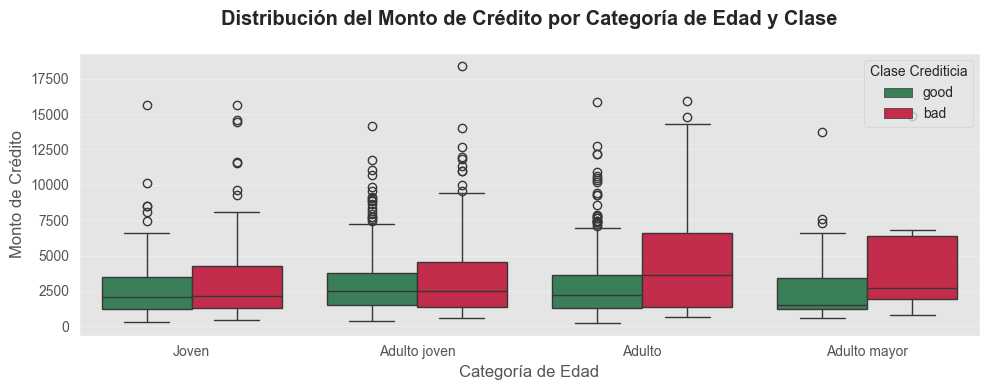

In [179]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='Age_cat', y='credit_amount', hue='class', 
            palette=palette)

plt.title('Distribución del Monto de Crédito por Categoría de Edad y Clase', fontweight='bold', pad=20)
plt.xlabel('Categoría de Edad'), plt.ylabel('Monto de Crédito')
plt.grid(True, alpha=0.3, axis='y')
plt.legend(title='Clase Crediticia', loc='upper right')
plt.tight_layout()
plt.show()

In [119]:
df['personal_status'].unique()

array(['male single', 'female div/dep/mar', 'male div/sep',
       'male mar/wid'], dtype=object)

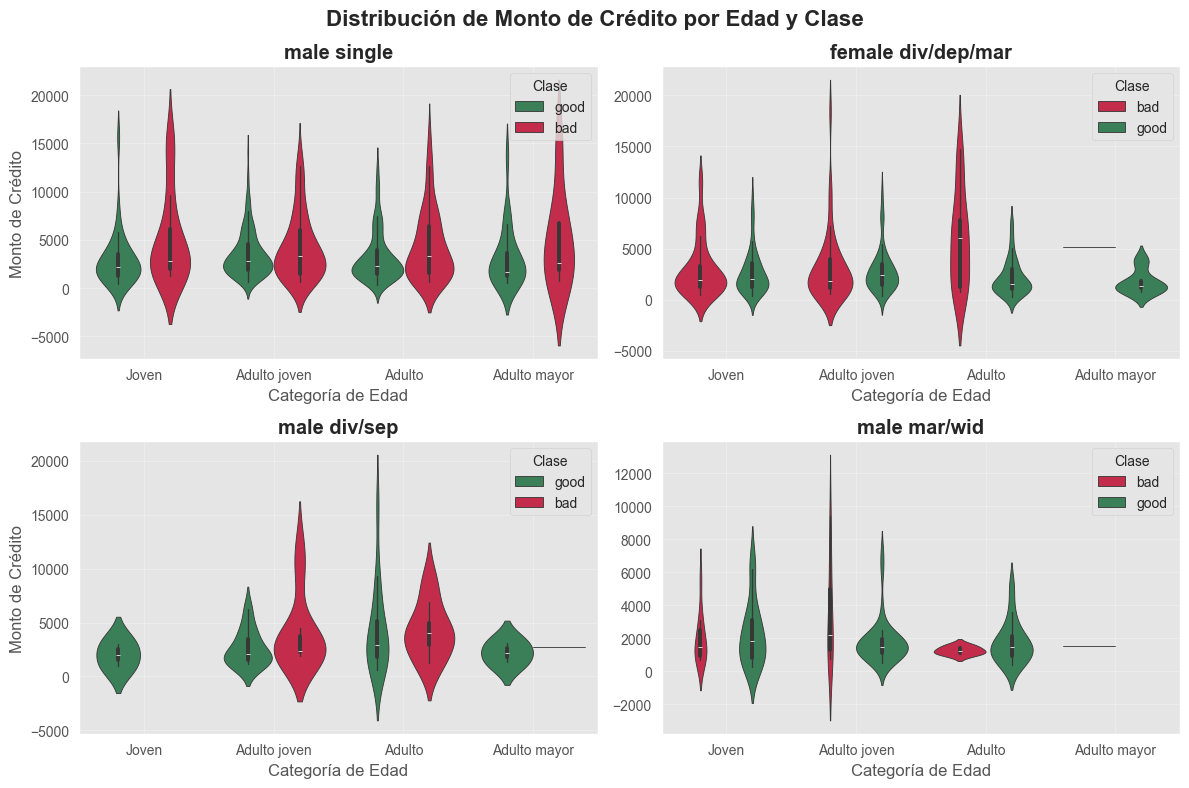

In [128]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  

for i, categoria in enumerate(categorias):
    datos_categoria = df[df['personal_status'] == categoria]
    
    sns.violinplot(data=datos_categoria, x='Age_cat', y='credit_amount', 
                   hue='class', palette=palette, ax=axes[i])
    
    axes[i].set_title(categoria, fontweight='bold')
    axes[i].set_xlabel('Categoría de Edad')
    axes[i].set_ylabel('Monto de Crédito' if i % 2 == 0 else '')
    axes[i].grid(True, alpha=0.3)
    axes[i].legend(title='Clase', loc='upper right')
    
plt.suptitle('Distribución de Monto de Crédito por Edad y Clase', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

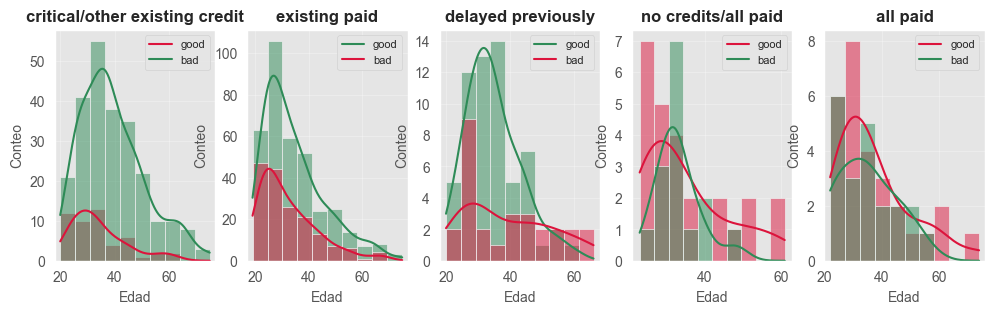

In [165]:
fig, axes = plt.subplots(1, 5, figsize=(12, 3)) 
axes = axes.flatten()
for i,categoria in enumerate(df['credit_history'].unique()):
    df_fil = df[df['credit_history'] == categoria]
    sns.histplot(data=df_fil, x='age', hue='class', bins=10, kde=True, 
                 palette=palette, ax=axes[i])
    axes[i].set_title(f'{categoria}', fontweight='bold', fontsize=12)
    axes[i].set_xlabel('Edad', fontsize=10), axes[i].set_ylabel('Conteo', fontsize=10)
    axes[i].grid(True, alpha=0.3), axes[i].legend(labels=palette.keys(), fontsize=8)
    axes[i].set_xlim(df_fil['age'].min() - 2, df_fil['age'].max() + 2)

#### 2.1.2 Exploración por el Sexo

In [27]:
sexo = {
    'male single': 'male',
    'female div/dep/mar': 'female',
    'male div/sep': 'male', 
    'male mar/wid': 'male'
}

def obtener_sexo(status):
    return sexo.get(status, 'no bin') 

df['sex'] = df['personal_status'].apply(obtener_sexo)

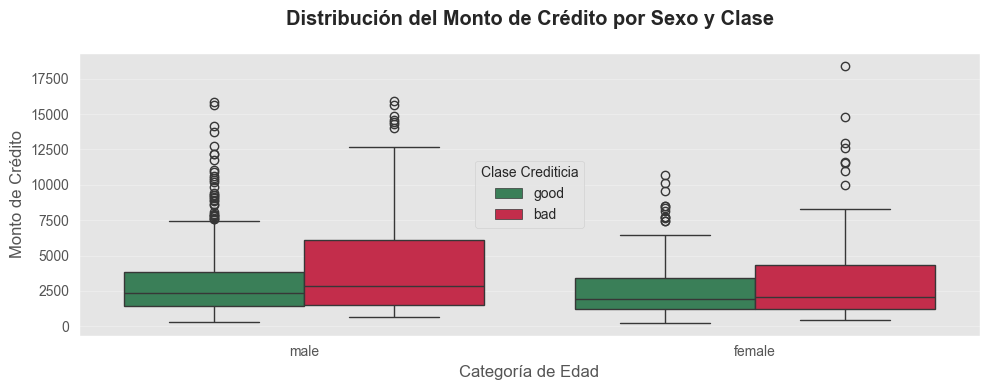

In [180]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='sex', y='credit_amount', hue='class', 
            palette=palette)

plt.title('Distribución del Monto de Crédito por Sexo y Clase', fontweight='bold', pad=20)
plt.xlabel('Categoría de Edad'), plt.ylabel('Monto de Crédito')
plt.grid(True, alpha=0.3, axis='y')
plt.legend(title='Clase Crediticia', loc='center')
plt.tight_layout()
plt.show()

In [170]:
stats = df.groupby(['sex', 'class'])['credit_amount'].agg(['count', 'mean', 'median', 'std', 'min', 'max']).round(2)
print(stats)

              count     mean  median      std    min      max
sex    class                                                 
female bad      109  3471.18  2039.0  3403.52  433.0  18424.0
       good     201  2555.98  1927.0  1979.43  250.0  10722.0
male   bad      191  4204.60  2820.0  3590.71  639.0  15945.0
       good     499  3158.45  2346.0  2533.13  276.0  15857.0


Considerando las proporciones de clases por sexo, una pregunta iteresante que nos surge es saber qué sexo tiene mayor probabilidad de incumplimiento crediticio según nuestros datos. 


Para ello podemos plantear la siguiente prueba de hipótesis
- $H_0$ No hay diferencia en proporción de 'bad' por género
- $H_A$ Las mujeres tienen mayor proporción de clase "bad" que los hombres

In [198]:
from scipy.stats import chi2_contingency

tabla_contingencia = np.array([[109, 201], 
                              [191, 499]]) 

chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)

print(f"Chi-cuadrado: {chi2:.4f}")
print(f"Valor p: {p_value:.6f}")
print(f"Grados de libertad: {dof}")
print("Valores esperados bajo independencia:")
print(expected)

Chi-cuadrado: 5.3485
Valor p: 0.020740
Grados de libertad: 1
Valores esperados bajo independencia:
[[ 93. 217.]
 [207. 483.]]


In [202]:
from statsmodels.stats.proportion import proportions_ztest

prop_mujeres_bad = 109 / 310
prop_hombres_bad = 191 / 690

count = np.array([109, 191])    # éxitos (bad)
nobs = np.array([310, 690])     # total observaciones

z_stat, p_value = proportions_ztest(count, nobs, alternative='larger')

print(f"Proporción mujeres bad: {prop_mujeres_bad:.3f}")
print(f"Proporción hombres bad: {prop_hombres_bad:.3f}")
print(f"Diferencia: {prop_mujeres_bad - prop_hombres_bad:.3f}")
print(f"Estadístico Z: {z_stat:.4f}")
print(f"Valor p (one-sided): {p_value:.6f}\n")

Proporción mujeres bad: 0.352
Proporción hombres bad: 0.277
Diferencia: 0.075
Estadístico Z: 2.3873
Valor p (one-sided): 0.008487



Nuestro análisis identifica que las mujeres presentan un $7.5\%$ mayor probabilidad de incumplimiento crediticio, con significancia estadística confirmada $(p < 0.05)$. Si bien este es un estudio observacional no se puede inferir causalidad. 

#### 2.1.3 Proposito del péstamo 

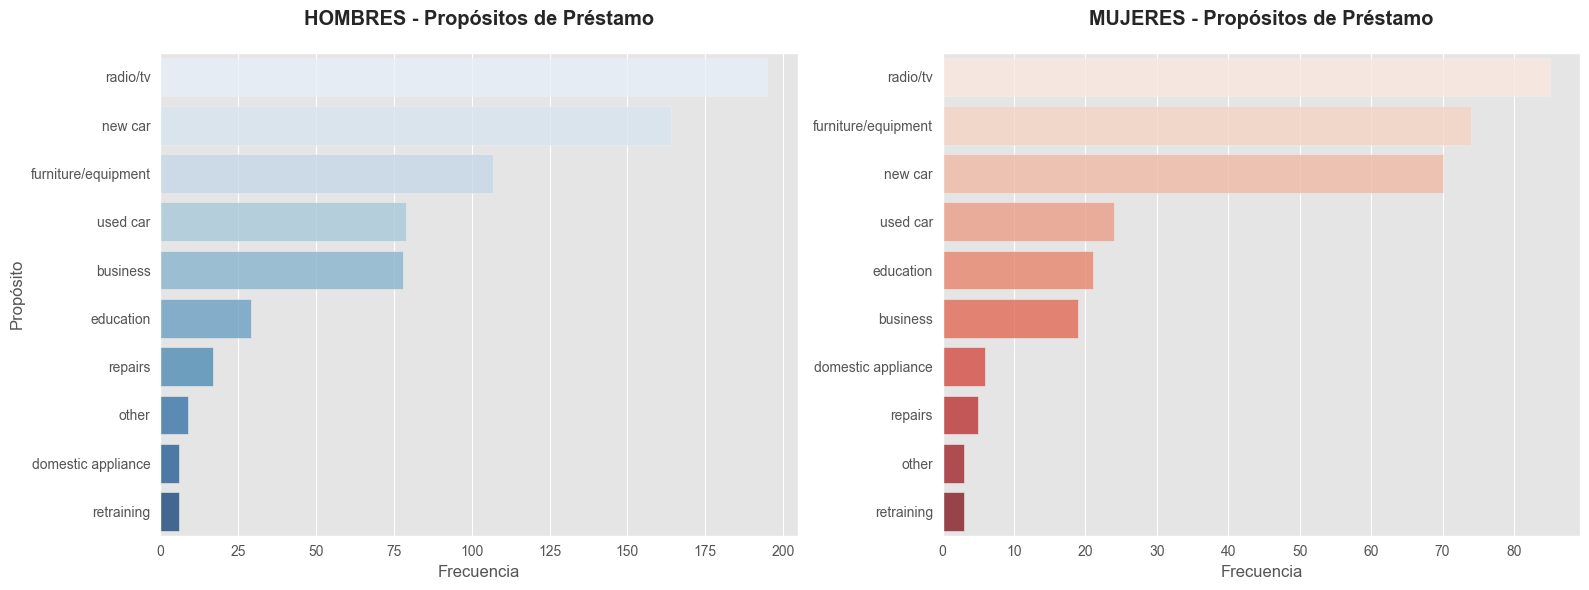

In [196]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df[df['sex'] == 'male'], y='purpose', 
              order=df[df['sex'] == 'male']['purpose'].value_counts().index,
              palette='Blues', alpha=0.8)
plt.title('HOMBRES - Propósitos de Préstamo', fontweight='bold', pad=20)
plt.xlabel('Frecuencia'), plt.ylabel('Propósito')

plt.subplot(1, 2, 2)
sns.countplot(data=df[df['sex'] == 'female'], y='purpose',
              order=df[df['sex'] == 'female']['purpose'].value_counts().index,
              palette='Reds', alpha=0.8)
plt.title('MUJERES - Propósitos de Préstamo', fontweight='bold', pad=20)
plt.xlabel('Frecuencia'), plt.ylabel('Propósito' if False else '')
plt.tight_layout()
plt.show()

In [7]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,Age_cat
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,67.0,none,own,2.0,skilled,1.0,yes,yes,good,Adulto mayor
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,22.0,none,own,1.0,skilled,1.0,none,yes,bad,Joven
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good,Adulto
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,45.0,none,for free,1.0,skilled,2.0,none,yes,good,Adulto
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,53.0,none,for free,2.0,skilled,2.0,none,yes,bad,Adulto


#### 2.2 Duración del credito


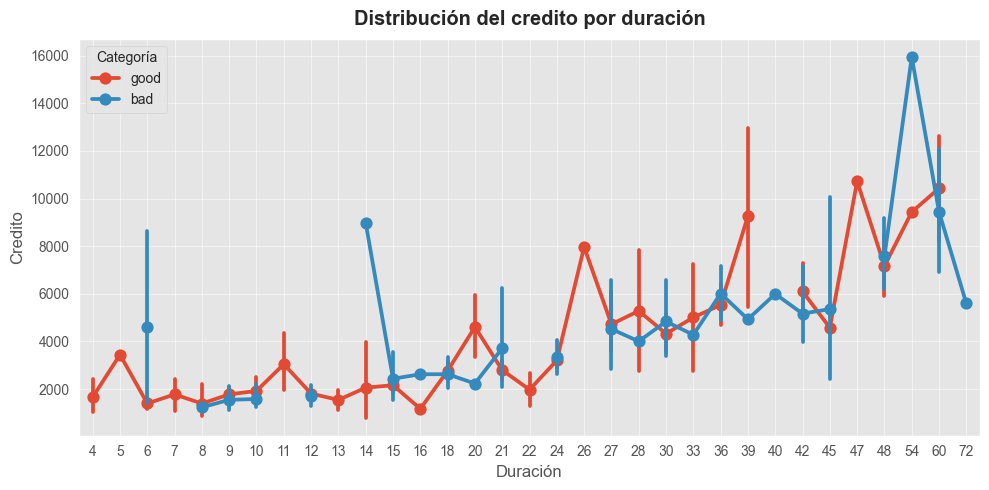

In [33]:
plt.figure(figsize=(10, 5))

df['duration'] = df['duration'].astype(int)
sns.pointplot(data=df, x='duration', y='credit_amount', hue='class') 
plt.title('Distribución del credito por duración', fontweight='bold', pad=10)
plt.xlabel('Duración'), plt.ylabel('Credito'), plt.grid(True, alpha=0.5)
plt.legend(title='Categoría')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

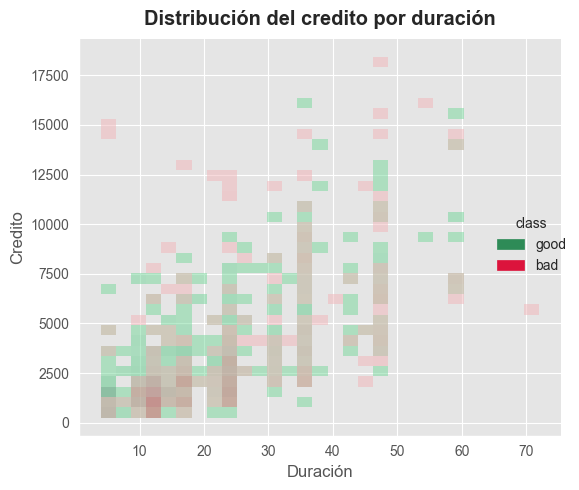

In [80]:
plt.figure(figsize=(10, 5))

sns.displot(data=df, x='duration', y='credit_amount', hue='class', kind='hist', palette=palette, alpha=0.5) 
plt.title('Distribución del credito por duración', fontweight='bold', pad=10)
plt.xlabel('Duración'), plt.ylabel('Credito')
plt.tight_layout()
plt.show()

#### 2.2.3 Variable Credit History

In [85]:
cols = ['installment_commitment', 'existing_credits', 'num_dependents']

# transformar elementos de cols en int16
for col in cols: 
    df[col] = df[col].astype('int16')


In [86]:
df.head()   

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,Age_cat,sex
0,<0,6,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4,male single,none,...,none,own,2,skilled,1,yes,yes,good,Adulto mayor,male
1,0<=X<200,48,existing paid,radio/tv,5951.0,<100,1<=X<4,2,female div/dep/mar,none,...,none,own,1,skilled,1,none,yes,bad,Joven,female
2,no checking,12,critical/other existing credit,education,2096.0,<100,4<=X<7,2,male single,none,...,none,own,1,unskilled resident,2,none,yes,good,Adulto,male
3,<0,42,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2,male single,guarantor,...,none,for free,1,skilled,2,none,yes,good,Adulto,male
4,<0,24,delayed previously,new car,4870.0,<100,1<=X<4,3,male single,none,...,none,for free,2,skilled,2,none,yes,bad,Adulto,male


In [ ]:
import os 


data_dir  = os.path.join(os.path.dirname(os.getcwd()), 'data')
df.to_csv(os.path.join(data_dir, 'clean_data.csv'), index=False)


In [98]:
data_dir

'c:\\Users\\ericl\\ml-project\\data'

In [56]:
X = df.drop(columns=['class', 'Age_cat'], axis=1)
y = df['class']

In [57]:
# Tranformar las columnas 
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [50]:
for feature in cat_features:
    print(f"{feature}: {X[feature].unique()}\n")

checking_status: ['<0' '0<=X<200' 'no checking' '>=200']

credit_history: ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']

purpose: ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']

savings_status: ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']

employment: ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']

personal_status: ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']

other_parties: ['none' 'guarantor' 'co applicant']

property_magnitude: ['real estate' 'life insurance' 'no known property' 'car']

other_payment_plans: ['none' 'bank' 'stores']

housing: ['own' 'for free' 'rent']

job: ['skilled' 'unskilled resident' 'high qualif/self emp/mgmt'
 'unemp/unskilled non res']

own_telephone: ['yes' 'none']

foreign_worker: ['yes' 'no']

sex: ['male' 'female']



In [58]:
ordinal_orders = {
    'employment': ['unemployed', '<1', '1<=X<4', '4<=X<7', '>=7'],
    'savings_status': ['no known savings', '<100', '100<=X<500', '500<=X<1000', '>=1000'],
    'checking_status': ['no checking', '<0', '0<=X<200', '>=200']
}

ordinal_features = ['employment', 'savings_status', 'checking_status']
onehot_features = [col for col in cat_features if col not in ordinal_features]

In [82]:
onehot_features

['credit_history',
 'purpose',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker',
 'sex']

In [84]:
[ordinal_orders[feat] for feat in ordinal_features]

[['unemployed', '<1', '1<=X<4', '4<=X<7', '>=7'],
 ['no known savings', '<100', '100<=X<500', '500<=X<1000', '>=1000'],
 ['no checking', '<0', '0<=X<200', '>=200']]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline



preprocessor = ColumnTransformer([
    ('ordinal', OrdinalEncoder(categories=[ordinal_orders[feat] for feat in ordinal_features]), ordinal_features),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), onehot_features),
    ('numeric', Pipeline([
        ('scaler', StandardScaler())
    ]), num_features)
])

In [60]:
X = preprocessor.fit_transform(X)

In [61]:
# le = LabelEncoder()
# y_encoded = le.fit_transform(df['class'])
y = df['class'].map({'bad': 0, 'good': 1}).values

In [62]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 52), (200, 52))

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [65]:
def evaluate_classification_model(true, predicted, predicted_proba=None):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    
    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    
    if predicted_proba is not None:
        roc_auc = roc_auc_score(true, predicted_proba)
        metrics['roc_auc'] = roc_auc
    
    return metrics

In [66]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(verbose=False, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

model_list = []
accuracy_list = []
f1_list = []
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predicciones
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Probabilidades para ROC-AUC (si el modelo lo soporta)
    if hasattr(model, 'predict_proba'):
        y_test_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_test_proba = None
    
    # Evaluar
    train_metrics = evaluate_classification_model(y_train, y_train_pred)
    test_metrics = evaluate_classification_model(y_test, y_test_pred, y_test_proba)
    
    print(f"{name}")
    print('Model performance for Training set')
    print(f"- Accuracy: {train_metrics['accuracy']:.4f}")
    print(f"- F1 Score: {train_metrics['f1']:.4f}")
    
    print('----------------------------------')
    print('Model performance for Test set')
    print(f"- Accuracy: {test_metrics['accuracy']:.4f}")
    print(f"- Precision: {test_metrics['precision']:.4f}")
    print(f"- Recall: {test_metrics['recall']:.4f}")
    print(f"- F1 Score: {test_metrics['f1']:.4f}")
    if 'roc_auc' in test_metrics:
        print(f"- ROC-AUC: {test_metrics['roc_auc']:.4f}")
    
    model_list.append(name)
    accuracy_list.append(test_metrics['accuracy'])
    f1_list.append(test_metrics['f1'])
    
    print('='*50)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.7612
- F1 Score: 0.8412
----------------------------------
Model performance for Test set
- Accuracy: 0.7350
- Precision: 0.7683
- Recall: 0.8936
- F1 Score: 0.8262
- ROC-AUC: 0.7305


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.8100
- F1 Score: 0.8723
----------------------------------
Model performance for Test set
- Accuracy: 0.7300
- Precision: 0.7702
- Recall: 0.8794
- F1 Score: 0.8212
- ROC-AUC: 0.7041


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7100
- Precision: 0.7986
- Recall: 0.7872
- F1 Score: 0.7929
- ROC-AUC: 0.6563


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7800
- Precision: 0.7975
- Recall: 0.9220
- F1 Score: 0.8553
- ROC-AUC: 0.

In [67]:
results_df = pd.DataFrame( list(zip(model_list, accuracy_list, f1_list)),
    columns=['Model Name', 'Accuracy', 'F1_Score']

)
results_df.sort_values(by=['Accuracy', 'F1_Score'], ascending=False)

,Model Name,Accuracy,F1_Score
5,CatBoost,0.805,0.871287
4,XGBoost,0.795,0.861953
3,Random Forest,0.780,0.855263
6,AdaBoost,0.780,0.852349
0,Logistic Regression,0.735,0.826230
1,K-Neighbors Classifier,0.730,0.821192
2,Decision Tree,0.710,0.792857
